***UNMIXING***

In [1]:
#Imports
import os
import sys
sys.path.insert(1,'./src')
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')
from read_funcs import read_prs_l2d, make_rgb, make_rgb_dc,reflectance_norm,get_coord_id,append_new_line,make_rgb_aerial,band_pairing,savenpastiff
from find_nearest import find_nearest
#from idx_mesh import idx_mesh
from img_list import prs_list
from datetime import datetime
import pathlib
from PIL import Image
import rasterio as rio
from osgeo import gdal
import h5py
import math
import cv2
import matplotlib.ticker as ticker

In [2]:
path_l2d = "../DATABASE/"
aerial_path="../DATABASE/aerial/"
PRISMA_path="../DATABASE/PRISMA/"
name='Gad161022'
name_img_prs=prs_list[name]
tstart_prs=prs_list[name][0]
tend_prs=prs_list[name][1]
filename='PRS_L2D_STD_'+tstart_prs+'_'+tend_prs+'_0001'
save=False
#put prisma variable true if you want to perform the unmixing on prisma image
prisma=False 
area='area5'
AREA='AREA5'
validation=fas
if prisma:
    if validation:
        path=PRISMA_path+'/validation/'+area+'/'
    else:
        path=PRISMA_path
else:
    path=aerial_path
if prisma:
    sensor='PRISMA'
else:
    sensor='aerial'

In [3]:
if prisma:
    """
    #copy aerial endmembers (first try, using mean and big ROI)
    trees = np.array([0.363055495728337,8.37231674922823,21.5612032450284,17.0376193553019,24.6846148323641,37.5688132672841,47.5799411300165,61.9867901500467,74.6679589345969,81.1040993610453,79.0336707588484,76.8492354081413,80.6734151769689,78.352932730275,84.6455596238064,93.1555029076028,94.193696604207,94.3993107904372,104.986646564721,109.449278483739,120.600976380214,127.547849809749,142.069279919592,155.53858855625,163.339579294996,165.039414171872,176.145451934812,170.136477851964,169.292196137555,162.094838107545,161.679015004667,162.571972144447,161.07487974729,163.559121257807,160.522506999785,161.892669969129,161.098786703999,161.884342020246,161.909182281571,159.811185296863,156.431761074018,158.369732213368,153.174958719219,155.084212793453,158.069064541604,171.317251776868,209.371814200589,257.49895900639,312.682102089167,361.740110560701,532.836671692153,631.612391413597,717.313805729054,776.194199152847,824.21308062316,818.137626534568,894.2228444253,921.297078038624,919.555029076028,931.22851604566,938.671979323713,943.594874003877,954.776509440735,948.297078038624,967.844784263048,979.621939837749,987.286811687846,1012.30511881686,1022.14538014215,1028.38861368368,1036.27230956996,1046.02031732357,1042.12893962237,1053.5475626391,1061.69129155,1038.43441740254,1044.01493287386,1049.11300165123,1054.05987508077,1058.48309282791,1062.77808887932,1064.25500753823,1066.19348122622,1069.13626247398,1071.91004379352,1074.5147533922,1076.35293273027,1079.52121473185,1082.30195993969,1085.3005958791,1089.53040419269,1102.76430468806,1115.99906669538,1117.40605930074,1124.91334625601,1135.9432837964,1148.46342163831,1155.78921674205,1166.75906382368,1173.99569244023,1180.72797760069,1185.68109699189,1199.50204609089,1203.13848804652,1214.96151913274,1206.22715198507,1197.87041424366,1185.85146098069,1174.39148539019,1164.43786345036,1153.93416612822,1143.45035537368,1132.46177040706,1119.20941919736,1101.96561131452,1082.75066408213,1061.00165123124,1039.33850240505,1019.01751740972,998.304616268217,978.528178620145,963.254792160241,949.261038121904,935.825256658769,927.394572474693,952.009763802139,976.619211716563,995.5759207409,1003.67743556609,1018.23670040922,1027.20776796611,1045.86747074449,1064.02900423577,1072.17359465863,1085.20109124847,1090.34144590423,1098.73063392921,1098.06238782396,1116.33577428387,1184.19628114007,1139.99052336851,1126.73343384306,1131.47792375619,1118.3135185584,1116.39478785268,1093.37325005384,1095.94026850456,1081.21028070931,1049.5944432479,1031.13906238782,1011.20094766315,966.709885849666,942.631560054562,918.442888936751,887.814918515328,856.69222485462,825.27561203245,793.148897982626,761.884054849594,723.446765740541,682.563500610238,643.165625673056,605.196424725393,568.647856989016,539.468806088018,511.189891593079,485.06073659272,467.100294349917,449.518845573982,434.612678584249,421.253930648288,409.265202096346,405.60808385383,401.40196711896,399.173020317324,397.558475123842,394.073659272022,383.306267499462,408.166128221696,433.030870845,424.972144446838,421.418192260751,443.949170794745,440.767750735875,464.515255940843,454.969272740326,470.58338717783,481.089094694522,484.241582310288,498.818149185153,495.823031086223,513.006030583674,504.521142939192,520.396726254577,534.921387034245,536.595950893819,531.153851676359,546.786201450212,539.450139995692,577.046808816139,580.374829492426,599.934740469524,577.659989949027,588.385598391844,593.91147964678,592.848230310862,620.001507645919,605.995548854907,609.645200660492,606.319549142078,605.379496015507,610.673056213655,603.502333261541,611.543183286668,597.415105176251,597.85950175892,589.81908248977,583.000430755977,588.809103309642,578.897480077536,560.169287098858,585.65080048819,557.768325077177,593.693373537224,576.689065977457,586.449134898413,540.103237849092,557.425227941704,538.043578146313,557.969416325652,535.291837174241,563.681096991887,535.983344102233,531.156364419556,522.562423720296,513.954627037117,456.130447268289,392.705793667887,330.400315887716,269.468447124704,250.188383947161,246.709885849666,243.305262402183,239.996841122837,236.916289755187,234.462057577716,232.089166487185,229.773422356235,227.517625098715,225.351999425659,223.226936607079,221.125996123196,219.050757412592,216.948165697466,214.635221480365,212.319908105392,209.995548854907,207.919305047024,206.043506353651,204.174815133893,202.301026635078,200.458467944576,201.674563859574,210.981262115012,220.010840692081,228.726398162108,227.47426233039,226.218249694881,233.271376265346,237.947447770838,237.213008830498,236.385024050542,235.886352214804,239.029219613755,241.190896690358,241.400315887716,281.519419915285,321.576566874865,324.890731567234,316.206332112858,347.805298298514,416.597099576423,349.70277837605,380.168210208917,361.741977169933,338.381003661426,324.550075382296,323.920094766315,318.999784622012,332.208270514753,328.428817574844,337.371455237275,344.528537583459,368.803216311293,371.548783114366,363.740972072654,368.56845430397,372.670902433771,380.998420561419,400.476487902936,390.33117955345,413.734008184364,399.11709383301,403.206978246823,406.564003158877,423.205039844928,410.693588915213,450.633498456458,444.499389762366,433.806949529758,432.046665230813,432.3993825831,439.939335199943,457.505348553378,462.910115586187,479.042501256372,490.022973652093,497.421853686553,512.35099432838,525.822241366932,538.962380644698,538.949027209419,530.465360040204,553.269007107474,588.49974872568,591.974082848733,592.031732356953,570.485964534425,508.489123411587,591.938258310001,554.786847584177,522.93000215378,535.56228013497,598.891521286524,551.488979826262,636.053198363127,584.314021107043,567.925335630699,587.911551439443,706.947806734152,651.345968841984,642.526958144878,623.786129657549,610.588197286237,589.102591715127]);
    bare_soil = np.array([64.3876130828114,191.401530967293,274.528879610299,280.079331941545,327.702157272095,391.667362560891,436.382741823243,484.773834377175,535.054975643702,565.432846207376,578.663187195546,583.441892832289,604.019485038274,606.59220598469,634.986778009742,668.458594293667,680.331245650661,693.821155184412,733.092553931802,754.613778705637,792.885873347251,812.974251913709,862.665274878218,912.559498956159,945.451635351427,957.606123869172,1007.36673625609,1008.54210160056,1039.70633263744,1035.48782185108,1052.4913013222,1072.6791927627,1076.78775226166,1100.71607515658,1104.12595685456,1124.33681280445,1128.06332637439,1136.81767571329,1144.68267223382,1152.44398051496,1137.37021572721,1161.51983298539,1153.42519137091,1163.42379958246,1180.06402226862,1223.08281141267,1322.42171189979,1415.30271398747,1508.29088378566,1547.25887265136,1668.2832289492,1753.57689631176,1806.6416144746,1832.59707724426,1872.39248434238,1830.55532359081,2050.67223382046,2033.97355601948,2017.62352122477,2043.85455810717,2061.74878218511,2074.38691718859,2099.01043841336,2090.37508698678,2144.61447459986,2167.8872651357,2181.96381350035,2235.33542101601,2254.91997216423,2271.23590814196,2289.36186499652,2313.95128740431,2305.47947112039,2334.66388308977,2356.8496868476,2314.48990953375,2334.32707028532,2356.19902574809,2378.80793319415,2403.74669450244,2428.11064718163,2452.93806541406,2476.31524008351,2503.55184411969,2528.46485734168,2550.17397355602,2569.58107167711,2589.71607515658,2603.54766875435,2618.02157272095,2637.01670146138,2662.74947807933,2688.46068197634,2679.48712595685,2684.72372999304,2698.16701461378,2715.5260960334,2721.5288796103,2738.6764091858,2745.07933194154,2753.83020180932,2759.51009046625,2787.44050104384,2791.97842727905,2816.99304105776,2791.72790535839,2775.79540709812,2778.80723729993,2779.08698677801,2771.14822546973,2765.90327070285,2760.63604732081,2757.87056367432,2753.59429366736,2742.2254697286,2730.64509394572,2726.34446764092,2724.73277661795,2720.24704244955,2707.10647181628,2692.99025748086,2684.61656228253,2674.44258872651,2663.65831593598,2660.05706332637,2700.43145441893,2740.7947112039,2800.43562978427,2827.91510090466,2861.46068197634,2874.70702853166,2908.88100208768,2940.13639526792,2943.89561586639,2969.46972860125,2973.5664578984,2991.10855949896,2988.52748782185,3051.26652748782,3261.92414752958,3122.93389004871,3075.41127348643,3086.71885873347,3053.62073764788,3060.65066109951,3019.59081419624,3044.35977731385,3046.70354906054,2982.9046624913,2969.62769659012,2951.70146137787,2858.05915100905,2822.66249130132,2785.13987473904,2740.74043145442,2695.22199025748,2643.04871259569,2579.88308977036,2518.98051496173,2453.54697286013,2387.61238691719,2324.24217118998,2263.08350730689,2203.79053583855,2152.27557411273,2101.8295059151,2054.68684759917,2022.25191370912,1990.6012526096,1959.06819763396,1928.44537230341,1902.85594989562,1902.69171885873,1902.59707724426,1904.34446764092,1906.32150313152,1903.12734864301,1868.83507306889,1927.93389004871,1987.03131524008,1951.27557411273,1911.65970772443,1994.91440501044,1962.99512874043,2046.43702157272,1986.02783576896,2032.07585247042,2056.89074460682,2044.72860125261,2078.10716771051,2039.11691022965,2086.20389700765,2030.17954070981,2076.98608211552,2119.07098121086,2098.69102296451,2053.40292275574,2094.19415448852,2044.69728601253,2173.91370911621,2163.40222686152,2214.61795407098,2112.51913709116,2130.94711203897,2132.23382045929,2114.40083507307,2201.03688239388,2139.16910229645,2144.52818371608,2121.51009046625,2123.33263743911,2147.17884481559,2121.02783576896,2152.60334029228,2105.53792623521,2117.73556019485,2100.59081419624,2092.71816283925,2129.43423799582,2100.57967988866,2038.06332637439,2138.66040361865,2035.01043841336,2164.96868475992,2098.03061934586,2143.16144745999,1973.32219902575,2036.44606819763,1970.11969380654,2038.46137787056,1968.40222686152,2063.77105080028,2006.88865692415,2006.0779401531,1990.80654140571,1974.74321503132,1844.0201809325,1698.96659707724,1555.21851078636,1413.57620041754,1371.02644398052,1366.37369519833,1362.04801670146,1358.19206680585,1354.37021572721,1349.27627000696,1344.74530271399,1340.70702853166,1337.07654836465,1334.74878218511,1333.05288796103,1331.51844119694,1330.04732080724,1327.53027139875,1319.05358385525,1310.62004175365,1302.27627000696,1293.00765483646,1283.00208768267,1273.27835768963,1263.92553931802,1255.00487125957,1257.62073764788,1290.07028531663,1322.44119693807,1354.58594293667,1349.79749478079,1345.46764091858,1373.41962421712,1392.97007654836,1392.18371607516,1391.21224773834,1390.71885873347,1396.79123173278,1390.29784272791,1354.4885177453,1492.94084899095,1631.1503131524,1651.85594989562,1620.42658315936,1717.21990257481,1942.25748086291,1647.3556019485,1831.70772442589,1770.53235908142,1755.61169102296,1697.90118302018,1716.01183020181,1706.41266527488,1752.54975643702,1730.39248434238,1774.34655532359,1778.71329157968,1846.02853166319,1907.24704244955,1871.85455810717,1899.29297146834,1873.62073764788,1862.75643702157,1914.94780793319,1852.97633959638,1916.86290883786,1840.23590814196,1858.52470424495,1821.13778705637,1856.20320111343,1789.84342379958,1831.10160055672,1784.71816283925,1737.65135699374,1753.76617954071,1741.57063326374,1749.47320807237,1733.61934585943,1733.1530967293,1707.58176757133,1705.07306889353,1667.61099512874,1643.1851078636,1624.72164231037,1600.82741823243,1589.26374391093,1510.24147529575,1520.63465553236,1502.81071677105,1503.91927627001,1484.47668754349,1444.97355601948,1315.33402922756,1460.99512874043,1403.73556019485,1353.04384133612,1338.91579679889,1410.57063326374,1341.7773138483,1495.73277661795,1439.00695894224,1408.96172581768,1376.62073764788,1594.13082811413,1481.456506611,1444.46276965901,1414.65274878219,1429.27070285317,1372.83298538622]);
    grassland = np.array([3.71610284167794,28.4673883626522,61.575101488498,51.2424898511502,79.5929634641407,116.84600811908,143.972395128552,172.849255751015,197.094722598106,211.690933694181,217.886603518268,220.973207036536,230.061975642761,230.841136671177,243.37699594046,258.482814614344,264.164546684709,272.596211096076,301.753721244926,333.408930987821,392.512043301759,455.204600811908,532.787821380244,594.031664411367,629.16698240866,645.590798376184,673.933423545331,651.73098782138,631.819215155616,593.244113667118,578.04248985115,573.774289580514,566.949661705007,570.059269282815,552.53098782138,544.936671177267,538.593775372124,540.970771312585,526.718267929635,500.637347767253,476.689580514208,467.418944519621,441.244654939107,436.965629228687,449.741813261164,520.302029769959,729.87550744249,1036.51231393775,1364.63870094723,1636.98971583221,2220.5399188092,2573.50527740189,2821.10852503383,2967.48687415426,3086.14397834912,3032.06549391069,3385.16535859269,3372.10365358593,3335.34776725304,3369.44790257104,3391.14641407307,3401.19377537212,3428.75859269283,3407.71177266576,3489.87361299053,3514.81813261164,3522.82219215156,3598.63328822733,3619.81921515562,3634.30365358593,3653.00730717185,3678.94857916103,3653.37780784844,3688.42273342355,3711.2949932341,3636.00676589986,3662.34073071719,3683.6649526387,3703.31799729364,3717.35399188092,3731.4200270636,3730.72124492558,3734.14966170501,3737.5548037889,3743.11041948579,3751.82192151556,3759.5201623816,3773.649797023,3789.04194857916,3804.71962110961,3820.92611637348,3874.87225981055,3928.81650879567,3910.1550744249,3916.22841677943,3936.59431664411,3964.82327469553,3972.20595399188,3996.6397834912,4003.43870094723,4011.87090663058,4016.300135318,4051.51745602165,4052.55778078484,4084.73856562923,4034.8,4039.8349120433,4002.57645466847,3971.51718538566,3958.55345060893,3939.44763193505,3920.45872801083,3895.65818673884,3861.33342354533,3815.42165087957,3759.24627875507,3679.86901217862,3596.7948579161,3523.73207036536,3459.13288227334,3400.04763193505,3357.16292286874,3323.15751014885,3292.60784844384,3280.10852503383,3394.97456021651,3509.83193504736,3572.48958051421,3595.04790257104,3621.73098782138,3624.6397834912,3653.58890392422,3682.56156968877,3677.47821380244,3698.41163734777,3689.74912043302,3701.13315290934,3680.61380243572,3740.74046008119,3986.64790257104,3802.65710419486,3728.40947225981,3726.17158322057,3657.12638700947,3634.43031123139,3550.81650879567,3541.59296346414,3501.27631935047,3379.08064952639,3310.75696887686,3237.61163734777,3076.03464140731,2983.03328822733,2891.28173207037,2768.71529093369,2644.12692828146,2522.99215155616,2406.38186738836,2292.50581867388,2141.23031123139,1975.97672530447,1816.79350473613,1663.63653585927,1516.84952638701,1405.54695534506,1298.35642760487,1200.66062246279,1137.5702300406,1076.00703653586,1029.67117726658,991.453315290934,957.191610284168,950.410825439783,940.791069012179,941.445737483085,945.884709066306,944.014073071718,925.441948579161,1039.65304465494,1153.87550744249,1107.6552097429,1091.55290933694,1149.51285520974,1140.61461434371,1203.10338294993,1180.20270635995,1220.93071718539,1249.52043301759,1256.31393775372,1293.11529093369,1284.24627875507,1331.49715832206,1310.40676589986,1359.78376184032,1407.15534506089,1399.59296346414,1374.07821380244,1413.78186738836,1395.03058186739,1510.3198917456,1522.21434370771,1569.62354533153,1510.33585926928,1538.16806495264,1550.60568335589,1550.63680649526,1632.32584573748,1594.43788903924,1610.38538565629,1604.12801082544,1623.27036535859,1649.76535859269,1632.75669824087,1658.150202977,1618.60460081191,1625.12584573748,1607.10933694181,1599.96400541272,1627.16914749662,1595.52855209743,1543.56887686062,1619.54100135318,1532.87604871448,1633.96400541272,1577.46468200271,1601.83788903924,1457.98322056834,1493.68470906631,1444.12313937754,1487.86359945873,1447.88119079838,1540.9748308525,1436.8798376184,1411.16048714479,1377.449797023,1344.1802435724,1136.02435723951,909.283626522327,687.928822733424,472.750202976996,403.4100135318,389.109878213802,375.036535859269,361.228146143437,348.861705006766,341.493640054127,334.210554803789,326.953450608931,319.775913396482,312.011366711773,304.02652232747,296.103924221921,288.313937753721,281.378349120433,278.725304465494,275.992692828146,273.19648173207,272.551285520974,273.706089309878,274.618132611637,275.299864682003,275.729634641407,283.000811907984,308.467929634641,332.589445196211,355.318538565629,355.905548037889,356.106630581867,373.63301759134,385.460351826793,385.471718538566,385.041407307172,385.855209742896,400.210554803789,419.485250338295,452.039783491204,549.62949932341,647.04600811908,665.400270635995,669.847631935047,756.505548037889,904.103112313938,755.73748308525,857.919621109608,825.565899864682,810.833288227334,795.059539918809,817.417591339648,824.680920162382,864.34100135318,865.696617050068,902.596211096076,919.977807848444,967.932611637348,1012.06278755074,1003.45818673884,1034.03626522327,1033.14641407307,1046.95642760487,1090.83031123139,1070.48525033829,1123.78755074425,1081.44357239513,1104.63761840325,1098.51935047361,1132.57780784844,1102.48849797023,1149.00568335589,1133.87929634641,1113.34262516915,1130.38132611637,1126.84194857916,1139.71529093369,1136.87848443843,1143.03247631935,1136.11447902571,1144.0652232747,1129.09174560217,1123.28822733424,1115.47821380244,1098.67117726658,1093.17861975643,1038.89391069012,1046.649797023,1039.5447902571,1041.2200270636,1021.12286874154,980.622192151556,884.583220568336,970.644113667118,922.143437077131,873.72151556157,849.132070365359,871.603247631935,806.804600811908,867.288768606225,806.936941813261,761.685791610284,730.114749661705,829.857916102842,759.515561569689,728.499594046008,694.171853856563,687.820027063599,652.850879566982]);
    artificial_surface = np.array([195.373674911661,418.539752650177,585.204946996466,670.590106007067,752.43109540636,845.32332155477,899.189045936396,957.490282685512,1016.74204946996,1038.73763250883,1034.68197879859,1020.57862190813,1030.77208480565,1007.67756183746,1022.96819787986,1049.2464664311,1050.39575971731,1041.70671378092,1076.25618374558,1075.95141342756,1091.90901060071,1076.05035335689,1097.32067137809,1126.78180212014,1142.39134275618,1134.39222614841,1173.70671378092,1158.95494699647,1176.16519434629,1160.46201413428,1167.46996466431,1179.99469964664,1169.35070671378,1182.44346289753,1183.24734982332,1196.72526501767,1193.83303886926,1196.52120141343,1202.11572438163,1214.46996466431,1211.17137809187,1233.91077738516,1221.44434628975,1235.06978798587,1239.32332155477,1262.01855123675,1307.41696113074,1326.31625441696,1349.49469964664,1352.17402826855,1438.86219081272,1482.71819787986,1494.78621908127,1499.12279151943,1527.04151943463,1488.5945229682,1663.20494699647,1632.33922261484,1615.25,1625.10954063604,1633.26236749117,1642.25088339223,1661.73586572438,1651.37279151943,1689.14222614841,1700.85335689046,1706.10335689046,1735.12367491166,1742.23851590106,1745.89664310954,1752.05035335689,1764.9964664311,1753.76766784452,1767.03533568905,1775.38780918728,1740.99293286219,1747.46113074205,1755.94434628975,1765.12897526502,1776.54946996466,1787.51325088339,1799.93286219081,1810.89487632509,1824.84628975265,1836.82332155477,1846.13692579505,1853.79328621908,1861.31890459364,1865.38780918728,1869.92667844523,1877.83127208481,1888.00883392226,1898.18462897527,1878.62279151943,1867.26943462898,1872.45759717314,1875.33480565371,1874.88957597173,1877.37455830389,1878.3683745583,1881.42667844523,1882.58833922261,1900.39664310954,1899.14399293286,1910.50971731449,1889.19346289753,1876.09187279152,1879.6925795053,1880.93639575972,1874.85159010601,1871.1925795053,1867.4964664311,1866.06890459364,1864.21643109541,1858.16166077739,1852.69169611307,1854.34275618375,1858.24028268551,1859.32597173145,1853.50706713781,1846.61395759717,1842.58215547703,1836.57155477032,1829.86042402827,1826.93727915194,1845.72614840989,1864.50530035336,1906.47084805654,1908.20759717314,1913.39045936396,1903.30918727915,1917.0945229682,1929.07155477032,1924.16342756184,1942.23939929329,1945.22791519435,1964.86307420495,1973.9593639576,2039.74116607774,2193.20583038869,2081.3445229682,2039.01590106007,2038.50706713781,2018.17402826855,2025.12985865724,2010.62102473498,2046.50706713781,2078.25176678445,2059.09098939929,2075.35600706714,2099.86925795053,2084.53268551237,2067.82243816254,2048.23056537102,2026.53356890459,2004.07862190813,1981.61130742049,1959.90901060071,1940.09187279152,1922.23674911661,1906.41254416961,1892.38339222615,1879.6148409894,1867.58568904594,1856.09982332155,1844.67932862191,1833.41607773852,1822.9628975265,1813.16696113074,1804.46819787986,1797.34540636042,1792.10865724382,1789.56978798587,1788.49469964664,1788.2296819788,1787.99028268551,1786.65901060071,1782.27826855124,1777.32950530035,1772.36130742049,1713.90901060071,1651.97703180212,1689.38339222615,1633.95494699647,1676.88957597173,1606.40901060071,1630.89929328622,1638.98409893993,1620.49381625442,1638.79416961131,1609.31625441696,1648.51501766784,1605.33127208481,1657.5406360424,1698.25971731449,1671.70141342756,1629.10247349823,1654.29858657244,1623.33127208481,1739.40636042403,1735.34010600707,1771.44346289753,1687.44081272085,1689.82067137809,1681.9628975265,1674.98409893993,1750.28356890459,1702.70229681979,1710.50441696113,1692.85335689046,1698.72084805654,1720.48939929329,1707.58833922261,1738.17049469965,1712.18109540636,1737.22879858657,1730.02738515901,1731.65636042403,1768.63427561837,1746.39045936396,1705.59893992933,1794.59717314488,1724.13339222615,1831.80918727915,1789.62985865724,1824.51325088339,1698.13339222615,1748.20583038869,1705.83745583039,1764.1148409894,1726.29593639576,1810.45229681979,1805.12632508834,1801.10512367491,1795.28798586572,1788.44434628975,1775.82508833922,1762.02120141343,1747.92667844523,1733.84275618375,1724.17049469965,1716.39752650177,1709.09893992933,1702.41519434629,1696.39840989399,1690.97173144876,1686.27738515901,1682.22879858657,1678.73498233216,1675.77385159011,1673.20318021201,1670.85954063604,1668.66342756184,1666.46643109541,1664.02296819788,1661.574204947,1659.15636042403,1656.76590106007,1654.46731448763,1652.43462897527,1650.77473498233,1649.58038869258,1649.40812720848,1651.08215547703,1653.35424028269,1656.31713780919,1658.29240282686,1660.8445229682,1665.12279151943,1669.26060070671,1672.62190812721,1675.79505300353,1678.61395759717,1681.08568904594,1682.23939929329,1681.21554770318,1685.39222614841,1689.58833922261,1707.90636042403,1682.66077738516,1767.51766784452,1939.43639575972,1696.90901060071,1841.51060070671,1780.86925795053,1763.03356890459,1717.91696113074,1729.64752650177,1724.70318021201,1761.24028268551,1743.35335689046,1781.16519434629,1784.38692579505,1836.0609540636,1885.17932862191,1856.88339222615,1883.89664310954,1864.76590106007,1860.50883392226,1896.54770318021,1851.40017667845,1899.58303886926,1830.64929328622,1843.56802120141,1817.35954063604,1838.57243816254,1784.91784452297,1818.39310954064,1783.05918727915,1745.88780918728,1756.50088339223,1747.66431095406,1759.82155477032,1753.81802120141,1760.50971731449,1754.63427561837,1765.66961130742,1754.77826855124,1753.04151943463,1755.08303886926,1743.2464664311,1748.54505300353,1690.58480565371,1706.64487632509,1710.53003533569,1723.4964664311,1710.824204947,1691.71996466431,1587.63074204947,1721.40812720848,1670.36572438163,1623.40989399293,1618.43197879859,1681.91872791519,1608.5167844523,1737.63250883392,1671.23851590106,1636.46466431095,1613.55035335689,1787.95229681979,1703.17844522968,1689.19522968198,1650.2332155477,1677.24911660777,1636.07332155477]);
    water = np.array([29.0583153347732,155.557235421166,255.533477321814,261.42656587473,308.966522678186,371.026997840173,412.873650107991,456.343412526998,495.447084233261,516.377969762419,527.049676025918,529.356371490281,545.22030237581,547.744060475162,573.473002159827,601.815334773218,607.72030237581,614.306695464363,649.058315334773,664.145788336933,690.928725701944,699.437365010799,730.026997840173,766.4686825054,792.965442764579,801.255939524838,849.250539956803,853.295896328294,883.296976241901,880.969762419006,895.11879049676,898.886609071274,886.408207343413,885.963282937365,869.97192224622,868.808855291577,859.870410367171,855.870410367171,861.921166306695,868.555075593952,845.187904967603,821.917926565875,776.938444924406,765.671706263499,772.030237580994,816.064794816415,898.993520518359,944.186825053996,957.549676025918,908.326133909287,882.45464362851,830.317494600432,772.549676025918,748.04211663067,751.329373650108,720.873650107991,814.600431965443,783.556155507559,777.195464362851,786.284017278618,793.292656587473,809.39524838013,829.95464362851,819.043196544276,817.958963282937,791.512958963283,744.350971922246,732.442764578834,717.937365010799,705.29373650108,692.183585313175,688.653347732181,669.260259179266,661.560475161987,649.182505399568,619.037796976242,611.089632829374,603.944924406048,597.074514038877,591.052915766739,584.850971922246,579.25161987041,573.110151187905,567.910367170626,562.01403887689,555.227861771058,547.953563714903,540.31101511879,533.655507559395,527.170626349892,521.668466522678,516.645788336933,511.576673866091,510.130669546436,513.685745140389,518.620950323974,525.380129589633,530.558315334773,537.401727861771,543.201943844492,549.300215982721,553.550755939525,562.479481641469,564.366090712743,569.560475161987,562.363930885529,555.7656587473,554.680345572354,552.827213822894,548.598272138229,545.150107991361,541.718142548596,538.990280777538,536.217062634989,532.247300215983,528.510799136069,527.064794816415,526.355291576674,524.677105831533,520.911447084233,516.802375809935,513.464362850972,509.516198704104,505.320734341253,502.130669546436,504.393088552916,506.682505399568,519.509719222462,523.371490280777,528.892008639309,530.565874730022,537.177105831533,543.876889848812,546.044276457883,551.264578833693,553.782937365011,557.798056155508,559.666306695464,576.168466522678,619.084233261339,582.933045356372,567.882289416847,565.509719222462,554.644708423326,553.886609071274,543.455723542117,545.435205183585,545.606911447084,536.082073434125,533.534557235421,535.979481641469,532.273218142549,527.83909287257,522.815334773218,517.427645788337,511.852051835853,506.346652267819,501.136069114471,496.264578833693,491.868250539957,487.845572354212,484.233261339093,480.831533477322,477.610151187905,474.416846652268,471.258099352052,468.08747300216,464.984881209503,462.026997840173,459.266738660907,456.861771058315,454.764578833693,453.039956803456,451.585313174946,450.286177105832,448.984881209503,447.48596112311,445.599352051836,442.941684665227,440.269978401728,427.66090712743,422.77969762419,440.046436285097,433.088552915767,450.628509719222,440.056155507559,451.739740820734,459.814254859611,459.425485961123,470.230021598272,463.724622030238,478.214902807775,468.463282937365,483.844492440605,496.901727861771,493.597192224622,482.759179265659,492.025917926566,483.303455723542,517.186825053996,515.252699784017,526.155507559395,500.205183585313,503.91252699784,505.153347732181,504.501079913607,527.342332613391,513.572354211663,516.874730021598,515.181425485961,516.612311015119,524.416846652268,519.106911447084,528.757019438445,519.591792656587,525.044276457883,522.607991360691,520.82505399568,529.097192224622,524.048596112311,509.70626349892,537.286177105831,514.590712742981,547.953563714903,530.167386609071,539.784017278618,497.295896328294,513.352051835853,495.39848812095,513.250539956803,496.712742980562,582.423326133909,577.327213822894,571.766738660907,565.744060475162,559.436285097192,552.785097192225,545.983801295896,539.05939524838,532.119870410367,525.249460043197,518.524838012959,512.018358531318,505.727861771058,499.67818574514,493.925485961123,488.413606911447,483.150107991361,478.080993520518,473.17818574514,468.38444924406,463.704103671706,459.032397408207,454.436285097192,449.816414686825,445.196544276458,440.572354211663,435.98596112311,431.429805615551,426.9686825054,422.623110151188,418.39524838013,414.302375809935,410.388768898488,406.676025917927,403.066954643628,399.710583153348,396.392008639309,393.186825053996,390.009719222462,386.804535637149,383.555075593952,380.151187904968,376.534557235421,372.722462203024,368.620950323974,364.086393088553,359.557235421166,360.022678185745,356.975161987041,388.276457883369,454.690064794816,376.876889848812,418.857451403888,396.917926565875,382.424406047516,365.61879049676,368.77969762419,363.029157667387,371.995680345572,367.343412526998,377.448164146868,376.677105831533,387.51403887689,400.996760259179,390.79373650108,395.982721382289,388.704103671706,386.882289416847,394.69222462203,378.879049676026,389.913606911447,373.667386609071,372.639308855292,364.145788336933,370.691144708423,352.719222462203,361.024838012959,350.713822894168,337.641468682505,337.712742980562,336.396328293736,334.295896328294,332.161987041037,334.566954643628,331.022678185745,334.204103671706,331.82181425486,334.071274298056,333.316414686825,328.603671706264,330.430885529158,315.026997840173,320.847732181425,325.099352051836,323.123110151188,318.816414686825,308.5,272.626349892009,305.177105831533,288.789416846652,270.67494600432,270.544276457883,294.685745140389,283.316414686825,315.034557235421,295.072354211663,288.771058315335,290.161987041037,350.240820734341,305.128509719222,306.826133909287,300.120950323974,297.421166306695,281.117710583153]);
    
    #copy aerial endmembers (second try, using mean and small ROI and new classes)
    trees = np.array([0,0,30,11,30,62.5,77,103.5,115,120,122,123,124.5,123,132,141.5,143,146,162,177.5,202,230,257,283,304,310,323,320,312,296.5,287,288,282,286.5,274,270,265,268,264.5,261.5,258,247.5,238,232,238.5,271.5,347,484.5,631,737,994.5,1192,1371,1524.5,1653,1685,1890.5,1901,1892.5,1916,1935.5,1952.5,1971,1962.5,2005.5,2021.5,2019,2062.5,2074,2085.5,2092.5,2120.5,2105.5,2103.5,2113,2081,2100.5,2105,2081.5,2083,2075,2037.5,2020,2002,1993,2007,2011.5,1982.5,1966,1966,1982,1987.5,1996,1992,2017,2050,2081,2090,2107,2115,2124,2131,2159,2163,2184.5,2173,2162,2153.5,2113.5,2093,2074,2059.5,2042,2004,1961,1915,1884.5,1866.5,1830.5,1802,1795,1787,1755.5,1738,1715.5,1740.5,1766,1799.5,1793.5,1815.5,1836,1857,1895,1896,1921,1917,1928.5,1933,1963.5,2083,1990,1967,1956,1928,1925.5,1854,1848.5,1818,1763.5,1714,1670.5,1603,1553.5,1509,1457.5,1388.5,1321,1267.5,1217,1141,1045,953,918.5,835.5,768.5,712,651,619.5,581.5,552,528.5,510,508.5,499,496,494,496,499,577.5,657,589,578,613,591.5,625,596.5,617,637.5,635.5,646,656,675,670,706,727,728.5,731,760,754.5,807.5,821,850,817,839,841.5,854,888,872,874.5,855,856,878,847,861,839,834,837.5,817,821.5,812,792,820,781,828.5,809.5,819,759,779,757,789,808,875,816,805.5,786.5,767.5,649.5,521,395.5,272.5,232,224,214,203,194,189,184,180,175.5,171,165.5,160.5,156,151.5,151.5,151,151,152,154.5,157.5,160,162,166,181.5,195,208,210.5,213,223,231,233,235,237.5,245.5,252,261.5,330.5,402.5,394,365.5,428.5,539,441,484,424.5,393.5,396,392,416,407,392.5,431,433.5,435,425,436.5,447.5,452,463.5,456,469.5,462,462.5,479,471.5,491.5,484,499.5,494,450.5,479,481.5,517,483.5,484.5,483,483.5,464,455.5,463.5,452.5,435.5,407,437,416,434.5,409.5,385.5,359,409,390.5,354.5,386,353,369.5,387.5,345,345,354,374,373,349,347.5,334,318.5]);
    unvegetated = np.array([55,194,267,284,328,386,428,471,512,534,542,546,560,558,581,610,614,624,658,677,714,736,785,824,845,855,898,894,915,900,911,922,919,941,936,948,952,957,958,957,939,956,950,964,984,1022,1121,1252,1397,1467,1622,1728,1774,1779,1813,1769,1983,1961,1935,1956,1962,1968,1987,1971,2019,2036,2048,2094,2112,2119,2134,2156,2140,2166,2178,2141,2159,2180,2200,2219,2243,2266,2286,2307,2322,2332,2345,2354,2356,2358,2367,2378,2387,2380,2376,2377,2387,2381,2389,2392,2392,2387,2408,2397,2417,2385,2369,2373,2375,2367,2362,2356,2354,2351,2344,2338,2340,2344,2345,2339,2329,2323,2316,2308,2304,2327,2349,2405,2425,2457,2463,2486,2504,2511,2521,2523,2528,2517,2562,2728,2615,2578,2589,2569,2578,2543,2560,2566,2515,2513,2492,2469,2446,2417,2388,2349,2307,2263,2217,2170,2113,2063,2016,1974,1927,1883,1840,1812,1792,1775,1756,1736,1727,1718,1712,1701,1690,1666,1667,1700,1652,1613,1679,1651,1717,1659,1696,1720,1715,1750,1726,1769,1723,1756,1789,1763,1713,1749,1700,1814,1809,1847,1759,1775,1774,1765,1851,1808,1829,1821,1840,1869,1850,1877,1835,1838,1817,1805,1828,1788,1731,1816,1724,1840,1789,1833,1686,1743,1694,1753,1704,1809,1749,1748,1736,1721,1635,1553,1398,1390,1378,1362,1346,1333,1316,1308,1305,1299,1292,1286,1276,1266,1262,1257,1250,1243,1241,1234,1221,1212,1204,1192,1187,1176,1175,1176,1173,1173,1204,1243,1235,1226,1221,1227,1199,1164,1358,1394,1429,1411,1522,1711,1469,1622,1568,1556,1496,1515,1509,1560,1529,1578,1581,1642,1698,1671,1703,1687,1690,1730,1686,1756,1688,1703,1675,1698,1650,1685,1657,1615,1630,1622,1642,1635,1634,1624,1627,1609,1592,1591,1565,1562,1490,1493,1483,1482,1471,1429,1306,1441,1381,1323,1311,1386,1309,1440,1380,1335,1312,1501,1414,1379,1344,1369,1323]);
    grassland = np.array([0,12,58,50,77,115,141,169,194,209,215,218,227,228,241,256,261,269,296,325,380,437,511,569,602,617,644,623,607,571,559,557,551,556,542,536,531,535,523,500,477,466,438,435,447,520,721,1008,1321,1586,2180,2526,2768,2911,3026,2972,3316,3308,3271,3306,3326,3336,3359,3339,3419,3445,3453,3528,3548,3563,3581,3605,3582,3615,3640,3566,3591,3611,3630,3644,3658,3657,3662,3666,3674,3682,3690,3705,3720,3737,3753,3807,3861,3843,3849,3869,3896,3904,3931,3935,3942,3947,3982,3983,4014,3968,3971,3936,3907,3894,3876,3857,3834,3800,3755,3699,3623,3543,3474,3410,3353,3311,3277,3247,3234,3349,3465,3526,3550,3578,3585,3618,3649,3646,3672,3665,3679,3663,3728,3974,3799,3727,3730,3663,3641,3559,3554,3514,3390,3323,3248,3086,2992,2899,2774,2648,2525,2408,2293,2141,1974,1814,1662,1516,1404,1297,1200,1138,1077,1030,992,958,951,941,941,945,943,925,1040,1154,1101,1082,1137,1126,1185,1162,1200,1229,1238,1277,1273,1319,1299,1347,1388,1378,1343,1376,1356,1467,1484,1529,1477,1511,1532,1538,1623,1586,1602,1594,1617,1639,1622,1644,1603,1607,1586,1579,1609,1574,1521,1598,1511,1611,1555,1584,1440,1480,1437,1487,1453,1544,1440,1415,1382,1349,1140,912,690,474,405,390,376,361,347,339,331,323,316,307,299,291,283,276,274,271,269,268,270,271,272,274,281,305,329,351,351,352,369,381,381,380,382,396,416,451,546,642,660,667,758,909,760,864,830,812,794,816,825,865,866,904,920,969,1012,1002,1033,1032,1046,1089,1070,1124,1081,1104,1099,1132,1102,1150,1135,1115,1131,1127,1140,1134,1141,1133,1139,1121,1113,1105,1085,1083,1028,1034,1022,1024,1003,965,873,953,906,863,835,858,793,853,796,753,722,817,750,720,687,679,646]);
    water = np.array([5.5,147,249,246.5,289,348,383,429.5,465,485.5,496,499,517,520,546,575,582,589,625,640,668,677,708,747,773,783,834,837,865,864,877,881,865,863,847.5,844.5,835.5,829,838.5,846,822,791,742,729.5,736.5,784.5,873,927,946.5,898,868,812,747.5,721,721,687,785,749,743,754.5,765,780.5,803,791.5,790.5,760.5,706,687.5,666.5,653,639,630,607,596,585,553,541,529.5,519,509,499,490,479,469.5,463,455,445.5,436.5,428,419,413,411,404.5,398.5,406,411,416.5,422,429,436,437,447.5,451,460.5,467,459,452,448,446,443,438.5,435.5,432,430,426.5,422,420,419,417,414,411,408.5,405.5,402,400,403,404.5,415,418,420,423,427,432.5,435,440,443.5,446,453,467,506.5,473,458,454,444,440,433,437.5,441,435,433,442,440,437.5,434,429.5,424,418,416.5,415,411,409,407,406,404,402,400,398.5,398,397,396,395,394,393,392,392,391.5,390.5,389,389,387.5,363,354.5,359,350.5,364,351,362.5,369.5,366.5,375,370,386,377.5,393,409,401,390.5,400,394.5,428.5,427,437,414,410,410,412.5,435.5,423.5,425,423,429,435,432,441.5,433.5,440,440,435.5,444.5,438,425,458,437,469,450.5,467,425.5,443,430,445.5,436,488,483.5,481,476.5,471,465.5,460,455,448,442,436.5,430.5,425.5,420.5,414,408.5,403.5,400,397,392,389,385.5,380,375.5,372,369,366,363,361.5,357,353.5,349.5,346,343,341,339,336.5,332,329,325,318,311,306,301,297,292,288,291,289,324,391,315,354.5,324,304,282,287,280,282,280,284,289,290,306.5,300,301,294.5,294,307.5,287,297.5,281.5,286,278,282.5,269,271,267,251.5,255.5,252,250.5,255,251,241.5,252,254,262,256.5,254,259,247,251,261,258,255,242,214,240.5,225,205,206,236,225,251,227,227,224,286,246,245,244,245,213]);
    shadow = np.array([0,0,0,0,0,0,0,0.5,10,12.5,11,9,12,11,13,17,18,18,23.5,22,25,25,28,32,33,32,36,32,32,29,30.5,29,28,29,28,29,28,28,28,28,27,28,27,28,28,30,36,42,50,58,76.5,96,116,131,144,148,159,167,168.5,167.5,168,169,176.5,174,171.5,176.5,182.5,182,187,188,189,192,192,193.5,193.5,182,182,181,181,182.5,183,185,185,188,189,188,187,185,183,181,182,185,187,184,193,191.5,196,202,202,207,209,210.5,213,216.5,217,217.5,206,207,206,200,196,191,188,184,177,171,169,167,165,158.5,152,147,142,137,134,142.5,152,157,156.5,159.5,158.5,162,168,168,170,170.5,172.5,171.5,178,186.5,178,173,176,172.5,170,168,165,163,166,158,161,157,154,152,149.5,147,144,140.5,137,134.5,129.5,125,122.5,119,116,113,111,108.5,107,105,103,101.5,99,97,95,93,92,90,90,91,79,76,75.5,71,72,68,70,70,69,71,70,73,73,79,85,81,80,80,80,87,89,90,87,86,84.5,85,92,89,90,88,89,91,91,90,93,92,93,92,93,93,91,96.5,94,103,103,107,97,102,98,108,109,122,120,118,116,114,108,105,102,98,95.5,93,92,89,87,85,84,83,81,79,77.5,75,73,71,70,68.5,67,66,64,62.5,61,58,56,54,52.5,51,50,48.5,47,47,45,43,41.5,39.5,37.5,36,39,38,37,39,46.5,57,46.5,51,44,37,34,39,38,32,31,33,33,38,32,31,38,32,35.5,35,41,38,39,30,43,42,36,42,43,44,44,46,46,38,48,44,73,66,49,82,67.5,751,722,730,731.5,730,721,703,650,712.5,684,658,646,676,628,687,646,629,610,700,655,634,618,620,589]);
    """
    trees = np.array([0,0,17,0,19,43,60,78,91,97,97,95,100,98,104,111,113,115,128,138,159,178,204,227,241,249,263,255,247,231,224,224,220,220,213,210,207,208,204,197,189.5,186,175,173,177,202,273,377,502,626,908,1113.5,1286,1414,1514,1514,1713,1713,1702,1720,1738,1748,1760,1753,1792.5,1809,1817,1855.5,1866,1876.5,1888,1903.5,1896,1909.5,1924.5,1882,1900,1901,1903,1907,1904,1896.5,1889,1887,1888.5,1889,1882.5,1878,1888,1890.5,1897.5,1920,1936,1949,1965,1985,2012,2027,2041.5,2057.5,2067.5,2072,2105,2108,2127,2105.5,2101.5,2064.5,2034,2017,1993,1973,1945,1914,1876,1832.5,1777,1720.5,1668.5,1622,1579,1544,1517,1489,1468,1500,1529,1563,1567,1585,1593,1624.5,1651,1664,1680,1687,1699,1699.5,1728.5,1831,1742,1714,1709.5,1678.5,1664,1620,1606,1577,1512,1458,1425,1356,1314,1272,1211,1153,1098.5,1048,997,928,851,779,714,650,602,559,515,488,461.5,441,425.5,412,409,404,408,410.5,410,406,456,505,470,452,465,450,468,450,465,472,470,478.5,476,493,491,519,546,547,540,557.5,559,614,623.5,647.5,622.5,634.5,638.5,642,680,659,662,655,659,662,654,664.5,651,652,644,641,650.5,637.5,622,662,639,697.5,675,691,631,653.5,639,670,665,717,670,655,639,623,532,433,330,227,193,185,176,169,161,157,153,149,145,141,136,132,127,124,123,123,122,122,124,126,127,129,132,143,153,162,163,164,171,176,177,177,178,185,196,216,252,291,292,290,330,396,321,359,332,306,291,297,291,301,298,304,305,315,327,318,323,319,321,335,328,344,331,338,340,353,342,357,355,344,348,347,347,344,345,343,340,334.5,330,328,315,313,299,309,307,306,294,280,254,284,271,254,252,262,247,266,249,241,241,274,247,245,237,231,223]);
    dead_trees = np.array([0,5,83,77,110,155,181,207,230,242.5,246.5,244,253,253,265,282,286,290,307,315,330.5,337.5,359,377,391,393,415,411.5,424,422,427,438.5,440,450,452,462.5,465.5,472,477,483,480,496,494.5,504,513,532,584,630,675.5,696.5,762,806,837,857.5,875,858,975,967,962,978,989,994,1014,1009,1041,1055.5,1068,1100,1106,1118,1131,1148,1151.5,1160,1174.5,1163.5,1170,1180.5,1197.5,1211,1226,1238,1249,1265,1280,1294.5,1310.5,1329,1338.5,1352,1358,1370.5,1381.5,1382,1387.5,1398,1409,1416,1423,1433,1440,1446,1461.5,1471,1487,1473.5,1465.5,1469,1472.5,1471,1472,1470,1469,1466.5,1460,1459,1458,1461.5,1462.5,1458,1452,1448,1443,1437.5,1437,1454.5,1472,1512.5,1529,1554,1565,1585.5,1610,1620,1637,1641,1651.5,1640,1668,1774.5,1704,1673,1684.5,1672,1677.5,1649,1661,1659,1627.5,1616,1594,1558,1537,1514,1487,1451.5,1419.5,1394,1362,1330.5,1303.5,1272,1247.5,1223,1199.5,1175.5,1154,1129,1110,1091,1073,1057.5,1046.5,1037.5,1026,1014,1004,985,985,980.5,979.5,971.5,1018,1019,1066.5,1048,1085,1102,1108,1138,1122,1148,1127.5,1146,1172,1168,1159,1188,1170,1244,1238,1279,1226,1252.5,1264,1262,1313.5,1275,1287,1283.5,1272.5,1280.5,1266.5,1282.5,1258.5,1259,1245,1228,1245,1234.5,1188.5,1241,1179.5,1254,1224,1249,1164,1208.5,1162,1212.5,1160,1222.5,1197,1192,1180,1169,1122,1067,1000.5,966.5,955,944,934,924.5,915,906,897.5,890,882,876,868.5,862,858,852.5,845,839.5,835,829.5,822,816,810,804.5,798,791,792,800,794,789.5,794,797,793,789.5,787,790.5,783,763,814.5,856,877,841,885,982,829,915,877,865,839,854,857,877,868.5,894,893.5,920.5,950,936,952,948.5,943.5,972.5,948,993,956.5,985,976,1008,974,1015,994.5,993,986,984,987,979,977.5,962,954.5,932.5,921,910,891,887.5,847.5,857,848,848.5,848,825.5,766.5,859,835.5,806.5,795,833,773,840.5,810,784.5,762.5,895,822.5,808.5,784,793,771.5]);
    unvegetated = np.array([55,194,267,284,328,386,428,471,512,534,542,546,560,558,581,610,614,624,658,677,714,736,785,824,845,855,898,894,915,900,911,922,919,941,936,948,952,957,958,957,939,956,950,964,984,1022,1121,1252,1397,1467,1622,1728,1774,1779,1813,1769,1983,1961,1935,1956,1962,1968,1987,1971,2019,2036,2048,2094,2112,2119,2134,2156,2140,2166,2178,2141,2159,2180,2200,2219,2243,2266,2286,2307,2322,2332,2345,2354,2356,2358,2367,2378,2387,2380,2376,2377,2387,2381,2389,2392,2392,2387,2408,2397,2417,2385,2369,2373,2375,2367,2362,2356,2354,2351,2344,2338,2340,2344,2345,2339,2329,2323,2316,2308,2304,2327,2349,2405,2425,2457,2463,2486,2504,2511,2521,2523,2528,2517,2562,2728,2615,2578,2589,2569,2578,2543,2560,2566,2515,2513,2492,2469,2446,2417,2388,2349,2307,2263,2217,2170,2113,2063,2016,1974,1927,1883,1840,1812,1792,1775,1756,1736,1727,1718,1712,1701,1690,1666,1667,1700,1652,1613,1679,1651,1717,1659,1696,1720,1715,1750,1726,1769,1723,1756,1789,1763,1713,1749,1700,1814,1809,1847,1759,1775,1774,1765,1851,1808,1829,1821,1840,1869,1850,1877,1835,1838,1817,1805,1828,1788,1731,1816,1724,1840,1789,1833,1686,1743,1694,1753,1704,1809,1749,1748,1736,1721,1635,1553,1398,1390,1378,1362,1346,1333,1316,1308,1305,1299,1292,1286,1276,1266,1262,1257,1250,1243,1241,1234,1221,1212,1204,1192,1187,1176,1175,1176,1173,1173,1204,1243,1235,1226,1221,1227,1199,1164,1358,1394,1429,1411,1522,1711,1469,1622,1568,1556,1496,1515,1509,1560,1529,1578,1581,1642,1698,1671,1703,1687,1690,1730,1686,1756,1688,1703,1675,1698,1650,1685,1657,1615,1630,1622,1642,1635,1634,1624,1627,1609,1592,1591,1565,1562,1490,1493,1483,1482,1471,1429,1306,1441,1381,1323,1311,1386,1309,1440,1380,1335,1312,1501,1414,1379,1344,1369,1323]);
    grassland = np.array([0,12,58,50,77,115,141,169,194,209,215,218,227,228,241,256,261,269,296,325,380,437,511,569,602,617,644,623,607,571,559,557,551,556,542,536,531,535,523,500,477,466,438,435,447,520,721,1008,1321,1586,2180,2526,2768,2911,3026,2972,3316,3308,3271,3306,3326,3336,3359,3339,3419,3445,3453,3528,3548,3563,3581,3605,3582,3615,3640,3566,3591,3611,3630,3644,3658,3657,3662,3666,3674,3682,3690,3705,3720,3737,3753,3807,3861,3843,3849,3869,3896,3904,3931,3935,3942,3947,3982,3983,4014,3968,3971,3936,3907,3894,3876,3857,3834,3800,3755,3699,3623,3543,3474,3410,3353,3311,3277,3247,3234,3349,3465,3526,3550,3578,3585,3618,3649,3646,3672,3665,3679,3663,3728,3974,3799,3727,3730,3663,3641,3559,3554,3514,3390,3323,3248,3086,2992,2899,2774,2648,2525,2408,2293,2141,1974,1814,1662,1516,1404,1297,1200,1138,1077,1030,992,958,951,941,941,945,943,925,1040,1154,1101,1082,1137,1126,1185,1162,1200,1229,1238,1277,1273,1319,1299,1347,1388,1378,1343,1376,1356,1467,1484,1529,1477,1511,1532,1538,1623,1586,1602,1594,1617,1639,1622,1644,1603,1607,1586,1579,1609,1574,1521,1598,1511,1611,1555,1584,1440,1480,1437,1487,1453,1544,1440,1415,1382,1349,1140,912,690,474,405,390,376,361,347,339,331,323,316,307,299,291,283,276,274,271,269,268,270,271,272,274,281,305,329,351,351,352,369,381,381,380,382,396,416,451,546,642,660,667,758,909,760,864,830,812,794,816,825,865,866,904,920,969,1012,1002,1033,1032,1046,1089,1070,1124,1081,1104,1099,1132,1102,1150,1135,1115,1131,1127,1140,1134,1141,1133,1139,1121,1113,1105,1085,1083,1028,1034,1022,1024,1003,965,873,953,906,863,835,858,793,853,796,753,722,817,750,720,687,679,646]);
    water = np.array([5.5,147,249,246.5,289,348,383,429.5,465,485.5,496,499,517,520,546,575,582,589,625,640,668,677,708,747,773,783,834,837,865,864,877,881,865,863,847.5,844.5,835.5,829,838.5,846,822,791,742,729.5,736.5,784.5,873,927,946.5,898,868,812,747.5,721,721,687,785,749,743,754.5,765,780.5,803,791.5,790.5,760.5,706,687.5,666.5,653,639,630,607,596,585,553,541,529.5,519,509,499,490,479,469.5,463,455,445.5,436.5,428,419,413,411,404.5,398.5,406,411,416.5,422,429,436,437,447.5,451,460.5,467,459,452,448,446,443,438.5,435.5,432,430,426.5,422,420,419,417,414,411,408.5,405.5,402,400,403,404.5,415,418,420,423,427,432.5,435,440,443.5,446,453,467,506.5,473,458,454,444,440,433,437.5,441,435,433,442,440,437.5,434,429.5,424,418,416.5,415,411,409,407,406,404,402,400,398.5,398,397,396,395,394,393,392,392,391.5,390.5,389,389,387.5,363,354.5,359,350.5,364,351,362.5,369.5,366.5,375,370,386,377.5,393,409,401,390.5,400,394.5,428.5,427,437,414,410,410,412.5,435.5,423.5,425,423,429,435,432,441.5,433.5,440,440,435.5,444.5,438,425,458,437,469,450.5,467,425.5,443,430,445.5,436,488,483.5,481,476.5,471,465.5,460,455,448,442,436.5,430.5,425.5,420.5,414,408.5,403.5,400,397,392,389,385.5,380,375.5,372,369,366,363,361.5,357,353.5,349.5,346,343,341,339,336.5,332,329,325,318,311,306,301,297,292,288,291,289,324,391,315,354.5,324,304,282,287,280,282,280,284,289,290,306.5,300,301,294.5,294,307.5,287,297.5,281.5,286,278,282.5,269,271,267,251.5,255.5,252,250.5,255,251,241.5,252,254,262,256.5,254,259,247,251,261,258,255,242,214,240.5,225,205,206,236,225,251,227,227,224,286,246,245,244,245,213]);
    shadow = np.array([0,0,0,0,0,0,0,0,9,12,11,8,11,9,12,17,17,17,21.5,21,24,24,28,32,33,31,35,31,32,28.5,29,29,27,28,27,27,26,27,27,26,26,27,25,26,26,29,35,40,50,59,80,98,118.5,135,148,152,161,170.5,174,175.5,175,176,178,178.5,179,181,186,189,193,194.5,195,197.5,196,202,202,197.5,196,196.5,195,196,196.5,198,199,202.5,203.5,204,202,200,196,194,195,197,198,202,204,207,214,212,219,222,223,226,228,228.5,233,231,220,220,219,213,208,203,200,196,189,183,181,181,179,172,165,160,155,149,146,156,165,168,169,171,173,177,180,182.5,186,187.5,190,191,193,203,195,192,192.5,188,188,183,182,179,176,172,172,167,163,159.5,155.5,152,147,143.5,139,135,130,126,122,118,114,110,106,103,100,97,94,91,89,86,84,82,79,76,74,72,66,63,66,62,63.5,61,61.5,62,62,64,63,66,66,69,72,71,70,72,70,77,78,79,76.5,77,76,75,81,77,78,78,78,80,80,80,78.5,80.5,80,79,80,77,76,81,79,84,84,85,77,81,79,83.5,86,94,92,93,94,92,88,82,76,71,70,69,68,68,66.5,64.5,63,62,61,59,58,56,55.5,54,53,51,50,48.5,47,46,44,43,42,41.5,41,40,39,38,37,36,34,33,32,31,30,29,33,32,32,29,43,47,40,45.5,36,30,28.5,33,32,27,31,27.5,29,33,32,31,32,31,33,35,35,36,36,31,36,38,36,40,42.5,41,40,45,39,38,47,48,62.5,74,59.5,109.5,764,760,727,736,739,739,727,710,655,717,692,664,652,682,636,698,652,634,617,704,666,647.5,629,627,600]);
    #convert aerial enbdmembers (345 bands) to PRISMA endmembers (215 bands) through band pairing and rescale endmembers to reflectance values
    aerial_bands=np.array([381.070000,387.770000,394.480000,401.190000,407.910000,414.630000,421.360000,428.100000,434.840000,441.590000,448.340000,455.100000,461.860000,468.630000,475.400000,482.180000,488.960000,495.750000,502.540000,509.330000,516.130000,522.940000,529.740000,536.560000,543.370000,550.190000,557.020000,563.840000,570.670000,577.510000,584.340000,591.180000,598.020000,604.870000,611.720000,618.570000,625.420000,632.280000,639.130000,645.990000,652.860000,659.720000,666.580000,673.450000,680.320000,687.190000,694.060000,700.930000,707.810000,714.680000,721.560000,728.430000,735.310000,742.190000,749.060000,755.940000,762.820000,769.700000,776.580000,783.460000,790.330000,797.210000,804.090000,810.960000,817.840000,824.710000,831.590000,838.460000,845.330000,852.200000,859.070000,865.940000,872.800000,879.670000,886.530000,893.390000,900.250000,907.100000,913.960000,920.810000,927.660000,934.500000,941.340000,948.180000,955.020000,961.860000,968.690000,975.720000,981.330000,986.940000,992.550000,998.160000,1003.770000,1009.370000,1014.980000,1020.590000,1026.200000,1031.800000,1037.410000,1043.020000,1048.620000,1054.230000,1059.830000,1065.440000,1071.040000,1076.650000,1082.250000,1087.860000,1093.460000,1099.060000,1104.670000,1110.270000,1115.870000,1121.470000,1127.080000,1132.680000,1138.280000,1143.880000,1149.480000,1155.080000,1160.680000,1166.280000,1171.880000,1177.470000,1183.070000,1188.670000,1194.270000,1199.860000,1205.460000,1211.060000,1216.650000,1222.250000,1227.840000,1233.440000,1239.030000,1244.620000,1250.220000,1255.810000,1261.400000,1266.990000,1272.590000,1278.180000,1283.770000,1289.360000,1294.950000,1300.540000,1306.120000,1311.710000,1317.300000,1322.890000,1328.480000,1334.060000,1339.650000,1345.230000,1350.820000,1356.400000,1361.990000,1367.570000,1373.150000,1378.740000,1384.320000,1389.900000,1395.480000,1401.060000,1406.640000,1412.220000,1417.800000,1423.380000,1428.960000,1434.540000,1440.110000,1445.690000,1451.270000,1456.840000,1462.420000,1467.990000,1473.560000,1479.140000,1484.710000,1490.280000,1495.850000,1501.420000,1506.990000,1512.560000,1518.130000,1523.700000,1529.270000,1534.840000,1540.410000,1545.970000,1551.540000,1557.100000,1562.670000,1568.230000,1573.790000,1579.360000,1584.920000,1590.480000,1596.040000,1601.600000,1607.160000,1612.720000,1618.280000,1623.840000,1629.390000,1634.950000,1640.510000,1646.060000,1651.610000,1657.170000,1662.720000,1668.270000,1673.830000,1679.380000,1684.930000,1690.480000,1696.030000,1701.570000,1707.120000,1712.670000,1718.220000,1723.760000,1729.310000,1734.850000,1740.390000,1745.940000,1751.480000,1757.020000,1762.560000,1768.100000,1773.640000,1779.180000,1784.720000,1790.250000,1795.790000,1801.320000,1806.860000,1812.390000,1817.930000,1823.460000,1828.990000,1834.520000,1840.050000,1845.580000,1851.110000,1856.640000,1862.160000,1867.690000,1873.220000,1878.740000,1884.260000,1889.790000,1895.310000,1900.830000,1906.350000,1911.870000,1917.390000,1922.910000,1928.430000,1933.940000,1939.460000,1944.970000,1950.490000,1956.000000,1961.510000,1967.030000,1972.540000,1978.050000,1983.560000,1989.060000,1994.570000,2000.080000,2005.580000,2011.090000,2016.590000,2022.090000,2027.600000,2033.100000,2038.600000,2044.100000,2049.600000,2055.090000,2060.590000,2066.090000,2071.580000,2077.070000,2082.570000,2088.060000,2093.550000,2099.040000,2104.530000,2110.020000,2115.510000,2120.990000,2126.480000,2131.960000,2137.450000,2142.930000,2148.410000,2153.890000,2159.370000,2164.850000,2170.330000,2175.810000,2181.280000,2186.760000,2192.230000,2197.710000,2203.180000,2208.650000,2214.120000,2219.590000,2225.060000,2230.520000,2235.990000,2241.450000,2246.920000,2252.380000,2257.840000,2263.300000,2268.760000,2274.220000,2279.680000,2285.140000,2290.590000,2296.050000,2301.500000,2306.960000,2312.410000,2317.860000,2323.310000,2328.760000,2334.200000,2339.650000,2345.100000,2350.540000,2355.980000,2361.420000,2366.870000,2372.310000,2377.740000,2383.180000,2388.620000,2394.050000,2399.490000])
    if save:
        np.save(aerial_path+'aerial_wl',aerial_bands)
    wl_prs=np.load(path_l2d+'/'+name+'_wl.npy')
    wl_prs_reduced = wl_prs[:216]
    trees_signature=band_pairing(trees,aerial_bands,wl_prs,wl_prs_reduced)
    trees_signature=trees_signature*0.0001
    #baresoil_signature=band_pairing(bare_soil,aerial_bands,wl_prs,wl_prs_reduced)
    #baresoil_signature=baresoil_signature*0.0001
    dead_trees_signature=band_pairing(dead_trees,aerial_bands,wl_prs,wl_prs_reduced)
    dead_trees_signature=dead_trees_signature*0.0001
    unvegetated_signature=band_pairing(unvegetated,aerial_bands,wl_prs,wl_prs_reduced)
    unvegetated_signature=unvegetated_signature*0.0001
    grassland_signature=band_pairing(grassland,aerial_bands,wl_prs,wl_prs_reduced)
    grassland_signature=grassland_signature*0.0001
    #artificial_signature=band_pairing(artificial_surface,aerial_bands,wl_prs,wl_prs_reduced)
    #artificial_signature=artificial_signature*0.0001
    water_signature=band_pairing(water,aerial_bands,wl_prs,wl_prs_reduced)
    water_signature=water_signature*0.0001
    shadow_signature=band_pairing(shadow,aerial_bands,wl_prs,wl_prs_reduced)
    shadow_signature=shadow_signature*0.0001

In [4]:
if prisma:
    ay=np.ones(np.shape(aerial_bands))
    py=np.ones(np.shape(wl_prs))*3
    pry=np.ones(np.shape(wl_prs_reduced))*2
    plt.figure(figsize=(50,15))
    plt.scatter(aerial_bands,ay,color="red",marker="|",s=1000)
    plt.scatter(wl_prs_reduced,pry,color="green",marker="|",s=1000)
    plt.scatter(wl_prs,py,color="blue",marker="|",s=1000)
    plt.legend(["Aerial" , "PRISMA reduced","PRISMA"],fontsize=40,bbox_to_anchor=(0.2, 0.9))
    plt.xticks(fontsize=40)
    plt.yticks(fontsize=0)

In [5]:
if prisma:
    #print signatures in the correct format to be inserted in GEE
    print('TREES SIGNATURE:')
    for b in trees_signature:
        print(str(b)+',',end="")
    
    print('\n\nDEAD TREES SIGNATURE:')
    for b in dead_trees_signature:
        print(str(b)+',',end="")
        
    print('\n\nUNVEGETATED SIGNATURE:')
    for b in unvegetated_signature:
        print(str(b)+',',end="")
        
    print('\n\nGRASSLAND SIGNATURE:')
    for b in grassland_signature:
        print(str(b)+',',end="")
        
    print('\n\nWATER SIGNATURE:')
    for b in water_signature:
        print(str(b)+',',end="")
        
    print('\n\nSHADOW SIGNATURE:')
    for b in shadow_signature:
        print(str(b)+',',end="")

In [6]:
if prisma:
    plt.figure(figsize=(15,5), tight_layout=True)
    plt.plot(shadow_signature,color='blue')
    plt.legend()
    plt.xticks(range(len(wl_prs_reduced)), [round(w, 2) for w in wl_prs_reduced], rotation=45)
    plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(8))
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Reflectance')
    plt.ylim([0,0.5])
    plt.title('PRISMA band paired Spectral signature of shadow')
    plt.figure(figsize=(15,5), tight_layout=True)
    shadow_aerial=shadow*0.0001
    plt.plot(shadow_aerial,color='green')
    plt.legend()
    plt.xticks(range(len(aerial_bands)), [round(w, 2) for w in aerial_bands], rotation=45)
    plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(8))
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Reflectance')
    plt.ylim([0,0.5])
    plt.title('asiaFENIX Spectral signature of shadow')
    plt.show()

In [7]:
#import abundance map created by GEE
if prisma:
    if validation:
        src = rio.open(PRISMA_path+'PRISMA_fractions_'+area+'_try6_UTM32N_clip.tif')
    else:
        src = rio.open(PRISMA_path+'PRISMA_fractions_'+area+'_try6_UTM32N.tif')
    fractions=src.read()
    src.close()
    fractions=np.moveaxis(fractions,0,2)
    print(np.shape(fractions))
    plt.hist(fractions.ravel(),bins=100)
    print(np.nanmin(fractions))
else:
    src = rio.open(aerial_path+'fractions_'+area+'_try6.tif') #'_fractions.tif' for first try '_fractions_area5_median_smallROI.tif' for second try
    fractions=src.read()
    src.close()
    fractions=np.moveaxis(fractions,0,2)
    print(np.shape(fractions))

(532, 379, 6)



KeyboardInterrupt



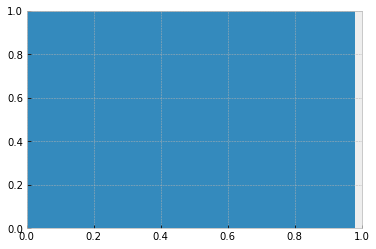

In [8]:
plt.hist(fractions.ravel(),bins=100)
print(np.nanmin(fractions))

In [ ]:
#import validation classification and count pixels trees 
src = rio.open(aerial_path+'Gad_classification_area5_32632.tif')
classification=src.read()
src.close()
classification=np.moveaxis(classification,0,2)
np.shape(classification)
plt.hist(classification.ravel(),bins=50)
print(np.max(classification.ravel()))
print(np.min(classification.ravel()))
total_pixels=np.where(classification!=10,1,0).sum()
print('total: ' + str(total_pixels))
trees_pixels=np.where((classification!=5) & (classification!=0) & (classification!=1),1,0).sum()
print('trees pixels: '+ str(trees_pixels))
percentage=round((trees_pixels*100)/total_pixels)
print("percentage of healhy trees' pixels: "+str(percentage)+'%')

In [ ]:
#import validation classification and count dead trees pixels  
print('total: ' + str(total_pixels))
deadtrees_pixels=np.where((classification==1),1,0).sum()
print('dead trees pixels: '+ str(deadtrees_pixels))
deadpercentage=round((deadtrees_pixels*100)/total_pixels)
print("percentage of dead trees' pixels: "+str(deadpercentage)+'%')

In [ ]:
#plot rgb image and trees abundances
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
if prisma:
    src = rio.open(PRISMA_path+'Gad_ref_UTM32N_COREG_'+AREA+'.tif')
    prs_intersected_cube=src.read()
    src.close()
    prs_intersected_cube=np.moveaxis(prs_intersected_cube,0,2)
    print(np.shape(prs_intersected_cube))
    wav=np.load(path_l2d+'/'+name+'_wl.npy')
    rgb = make_rgb_dc(prs_intersected_cube[:,:,:62],wav)
else:
    src_aerial = rio.open(aerial_path+'Gad_'+area+'_UTM32N.tif')
    aerial_intersected_cube=src_aerial.read()
    src_aerial.close()
    aerial_intersected_cube=np.moveaxis(aerial_intersected_cube,0,2)
    rgb = make_rgb_aerial(aerial_intersected_cube)
    threshold=1500
    rgb[rgb>threshold]=threshold
    rgb=rgb/threshold
plt.imshow(rgb)
plt.title(sensor+' RGB',fontsize=35,fontweight='bold')
plt.subplot(1,2,2)
plt.imshow(fractions[:,:,0],cmap='turbo')
plt.title('healthy trees mask',fontsize=35,fontweight='bold')
plt.colorbar()

In [ ]:
#plot rgb image and dead trees abundances
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
plt.imshow(rgb)
plt.title(sensor+' RGB',fontsize=35,fontweight='bold')
plt.subplot(1,2,2)
plt.imshow(fractions[:,:,1],cmap='turbo')
plt.title('dead trees mask',fontsize=35,fontweight='bold')
plt.colorbar()

In [ ]:
#plot rgb image and bare soil abundances
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
plt.imshow(rgb)
plt.title(sensor+' RGB',fontsize=35,fontweight='bold')
plt.subplot(1,2,2)
plt.imshow(fractions[:,:,2],cmap='turbo')
plt.title('unvegetated mask',fontsize=35,fontweight='bold')
plt.colorbar()

In [ ]:
#plot rgb image and grassland abundances
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
plt.imshow(rgb)
plt.title(sensor+' RGB',fontsize=35,fontweight='bold')
plt.subplot(1,2,2)
plt.imshow(fractions[:,:,3],cmap='turbo')
plt.title('grassland mask',fontsize=35,fontweight='bold')
plt.colorbar()

In [ ]:
#plot rgb image and artificial surface abundances
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
plt.imshow(rgb)
plt.title(sensor+' RGB',fontsize=35,fontweight='bold')
plt.subplot(1,2,2)
plt.imshow(fractions[:,:,4],cmap='turbo')
plt.title('water mask',fontsize=35,fontweight='bold')
plt.colorbar()

In [ ]:
#plot rgb image and water abundances
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
plt.imshow(rgb)
plt.title(sensor+' RGB',fontsize=35,fontweight='bold')
plt.subplot(1,2,2)
plt.imshow(fractions[:,:,5],cmap='turbo')
plt.title('shadow mask',fontsize=35,fontweight='bold')
plt.colorbar()

In [ ]:
#create binary mask for healthy trees
plt.figure(figsize=(30,20))
plt.subplot(1,2,2)
threshold=100-percentage #compute the percentile threshold from the percentage of trees pixels in aerial classification
print(np.nanpercentile(fractions[:,:,0],threshold))
binary_healthytrees=np.where(fractions[:,:,0]>np.nanpercentile(fractions[:,:,0],threshold),1,0)
#binary_healthytrees=np.where(fractions[:,:,0]>0.2,1,0)
if save:
    np.save(path+name+'_healthy_trees_mask',binary_healthytrees)
plt.imshow(binary_healthytrees,cmap='binary')
plt.title("Binary mask healthy trees",fontsize=35,fontweight='bold')
plt.subplot(1,2,1)
plt.imshow(rgb)
plt.title(sensor+' RGB',fontsize=35,fontweight='bold')

In [ ]:
#create binary mask for dead trees
plt.figure(figsize=(30,25))
plt.subplot(1,2,2)
#deadpercentage=0
deadthreshold=100-deadpercentage #compute the percentile threshold from the percentage of trees pixels in aerial classification
print(np.nanpercentile(fractions[:,:,1],deadthreshold))
binary_deadtrees=np.where(fractions[:,:,1]>np.nanpercentile(fractions[:,:,1],deadthreshold),1,0)
#binary_deadtrees=np.where(fractions[:,:,1]>0.4,1,0)
if save:
    np.save(path+name+'_dead_trees_mask',binary_deadtrees)
plt.imshow(binary_deadtrees,cmap='binary')
plt.title("Binary mask dead trees",fontsize=35,fontweight='bold')
plt.subplot(1,2,1)
plt.imshow(rgb)
plt.title(sensor+' RGB',fontsize=35,fontweight='bold')

In [ ]:
#make union of healthy and dead trees binary mask to obtain final trees mask
trees_mask = binary_healthytrees | binary_deadtrees
if save:
    np.save(path+name+'_trees_mask',trees_mask)
plt.figure(figsize=(30,20))
plt.subplot(1,2,2)
plt.imshow(trees_mask,cmap='binary')
plt.title("Healthy binary mask trees",fontsize=35,fontweight='bold')
plt.subplot(1,2,1)
plt.imshow(rgb)
plt.title(sensor+' RGB',fontsize=35,fontweight='bold')

In [ ]:
median_blur= cv2.medianBlur(trees_mask.astype('float32'), 3)
cv2.imshow('median_blur', median_blur)  
if not validation:
    if save:
        np.save(path+name+'_trees_mask_sieved',median_blur)
else:
    if save:
        np.save(path+name+'_trees_mask_sieved',trees_mask)

In [ ]:
plt.figure(figsize=(30,20))
plt.subplot(1,2,1)
plt.imshow(trees_mask,cmap='binary')
plt.title('ORIGINAL',fontsize=35,fontweight='bold')
plt.subplot(1,2,2)
plt.imshow(median_blur,cmap='binary')
plt.title('SIEVED',fontsize=35,fontweight='bold')

In [ ]:
np.shape(median_blur)